In [44]:
from datasets import CSSDataset
import matplotlib.pyplot as plt
!pip install nltk
!pip install googletrans
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/patrick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/patrick/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [45]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [46]:
import os
os.listdir("../data")

['CSSDataset']

In [47]:
dataset = CSSDataset("../data/CSSDataset")



In [48]:
gen_mod = dataset.generate_random_query_target()["mod"]["str"]

from googletrans import Translator
translator = Translator(service_urls=['translate.google.com.vn'])
translations = translator.translate([gen_mod],dest="vi")
for tran in translations:
    print(tran.origin, tran.text)

add large purple object to middle-right thêm đối tượng lớn màu tím vào giữa bên phải


In [49]:
gen_mod

'add large purple object to middle-right'

In [50]:
word_count("what the what fuck")

{'what': 2, 'the': 1, 'fuck': 1}

In [51]:
full_str = ""
full_dataset = dataset.data["train"]["mods"] + dataset.data["test"]["mods"]
for mod in full_dataset:
    full_str +=  (" " + mod["to_str"]) 

In [52]:
word_count(full_str)

{'make': 8319,
 'middle-left': 1148,
 'large': 4545,
 'circle': 3105,
 'green': 1971,
 'middle-right': 1147,
 'rectangle': 2085,
 'small': 4481,
 'blue': 1970,
 'object': 4724,
 'add': 2074,
 'brown': 1992,
 'to': 1860,
 'middle-center': 1140,
 'top-left': 1140,
 'top-center': 1149,
 'remove': 1630,
 'bottom-center': 1148,
 'red': 1993,
 'bottom-left': 1136,
 'yellow': 1961,
 'triangle': 2109,
 'gray': 1994,
 'purple': 1975,
 'bottom-right': 1151,
 'top-right': 1109,
 'cyan': 1991}

In [53]:
type_to_words_map = {
    "VB":["make","add","remove"],
#     "<VB_add>":["add"],
#     "<VB_remove>":["remove"],
    "PP":["to"],
    "JJ":["small","large","green","blue","brown","gray","purple","cyan","red","yellow"],
    "NN":["circle","rectangle","triangle","object"],
    "JJ_pos":["middle-left",'middle-right','middle-center','bottom-center','bottom-left','bottom-right','top-right','top-left','top-center']
}

def sentence_format(sentence, type_to_words_map):
    words = set(sentence.split(" "))            
    sentence_list = sentence.split(" ")

    for word in words:
        for vocab_type, list_vocabs in type_to_words_map.items():
            if word in list_vocabs:
                while word in sentence_list:
                    sentence_list[sentence_list.index(word)] = vocab_type 
                
    fmt_sentence = " ".join(sentence_list)
    return fmt_sentence

sentence_formats = {}
sentences = []
demo_sentences = []

for mod in full_dataset:
    sentence = mod["to_str"]
    sentences.append(sentence)
    formatted_sentence = sentence_format(sentence,type_to_words_map)

    sentence_formats[formatted_sentence] = sentence 
    
    


In [54]:
grammar_str = ""

# Create grammar by vocab-only
for word_type, words in type_to_words_map.items():
    for word in words:
        grammar_str += f"{word_type} -> {word}\n"
    
print(grammar_str)    

VB -> make
VB -> add
VB -> remove
PP -> to
JJ -> small
JJ -> large
JJ -> green
JJ -> blue
JJ -> brown
JJ -> gray
JJ -> purple
JJ -> cyan
JJ -> red
JJ -> yellow
NN -> circle
NN -> rectangle
NN -> triangle
NN -> object
JJ_pos -> middle-left
JJ_pos -> middle-right
JJ_pos -> middle-center
JJ_pos -> bottom-center
JJ_pos -> bottom-left
JJ_pos -> bottom-right
JJ_pos -> top-right
JJ_pos -> top-left
JJ_pos -> top-center



In [55]:
def move_word_in_grammar(grammar, word_to_move, word_dest_after):
    grammar = grammar.split(" ")
    
    grammar.insert(grammar.index(grammar.index(word_dest_after), grammar.pop(grammar.index(word_to_move))))
    
    return " ".join(grammar)

def rule_based_en_to_vi_grammar(en_grammars):
    pass
    
    

In [56]:
print("hello")

hello


# Dịch

In [57]:
from urbamt import Translator
from tqdm import tqdm

In [58]:
Translator

urbamt.translator.Translator

In [59]:
sentence_formats

{'VB JJ_pos JJ NN JJ': 'make bottom-left gray circle blue',
 'VB JJ_pos NN JJ': 'make top-left rectangle blue',
 'VB JJ NN JJ': 'make brown circle red',
 'VB JJ NN': 'remove red circle',
 'VB JJ NN PP JJ_pos': 'add red triangle to bottom-left',
 'VB NN JJ': 'make triangle yellow',
 'VB JJ_pos NN': 'remove middle-right circle',
 'VB JJ_pos JJ NN': 'remove middle-center gray triangle',
 'VB NN PP JJ_pos': 'add triangle to top-center',
 'VB NN': 'remove circle',
 'VB JJ JJ NN': 'remove large blue triangle',
 'VB JJ JJ NN JJ': 'make small red circle yellow',
 'VB JJ_pos JJ JJ NN': 'remove middle-left small cyan rectangle',
 'VB JJ_pos JJ JJ NN JJ': 'make top-center large gray object green',
 'VB JJ JJ NN PP JJ_pos': 'add large blue circle to middle-right'}

In [60]:
from urbamt import Translator 

src_grammar = """
            S -> VP | VP
            NP -> JJ NP 
            NP -> NN
            VP -> VB NP
            VP -> VP JJ 
            VP -> VB
            VP -> VP PP JJ 
            VB -> 'make' | 'add' | 'remove'
            PP -> 'to'
            JJ -> 'small' | 'large'
            NN -> 'circle' | 'rectangle' | 'triangle' | 'object'
            JJ -> 'green' | 'blue' | 'brown' | 'gray' | 'purple' | 'cyan' | 'red' | 'yellow'
            JJ -> 'middle-left' | 'middle-right' | 'middle-center' | 'bottom-center' | 'bottom-left' | 'bottom-right' | 'top-right' | 'top-left' | 'top-center'
            """

en_to_vi_dictionary = {
            "object":"khối",
            "circle":"khối cầu",
            "triangle":"khối trụ",
            "rectangle":"khối hộp chữ nhật",
            "make": "biến",
            "add":"thêm", 
            "remove":"xóa",
            "brown":"màu nâu",
            "green":"màu xanh lá",
            "blue":"màu xanh dương",
            "gray":"màu xám",
            "purple":"màu tím",
            "cyan":"màu lam",
            "red":"màu đỏ",
            "yellow":"màu vàng",
            "middle-left":"bên trái",
            "middle-right":"bên phải",
            "middle-center":"trung tâm",
            "bottom-center":"chính giữa phía dưới",
            "bottom-left":"góc trái phía dưới",
            "bottom-right":"góc phải phía dưới",
            "top-right": "góc phải phía trên",
            "top-left": "góc trái phía trên",
            "top-center": "chính giữa phía trên",
            "small":"nhỏ",
            "large":"lớn",
            "to":"vào"
}
                          
#en_to_vi_grammar = {}#{"NP1 -> JJ_color NP": "NP1 -> NP JJ_color"}
en_to_vi_grammar = {"NP -> JJ NP":"NP -> NP JJ",
                    "VP -> VP JJ":"VP -> VP thành JJ"}

translator = Translator(src_grammar = src_grammar,
                        src_to_tgt_grammar = en_to_vi_grammar,
                        src_to_tgt_dictionary = en_to_vi_dictionary)

In [61]:
for mode in ["train","test"]:
    for idx, mod in tqdm(enumerate(dataset.data[mode]["mods"])):
        txt = mod["to_str"]
        dataset.data[mode]["mods"][idx]["to_str"] = translator.translate(txt)[0]

6004it [00:07, 774.65it/s]
6019it [00:10, 567.15it/s]


biến khối trụ thành màu lam


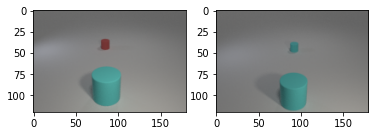

In [62]:
gen_mod = dataset.generate_random_query_target()
gen_src_img = gen_mod["source_img_data"]
gen_tgt_img = gen_mod["target_img_data"]
mod_str = gen_mod["mod"]["str"]
plt.subplot(1,2,1)
plt.imshow(gen_src_img)
plt.subplot(1,2,2)
plt.imshow(gen_tgt_img)
print(mod_str)

In [63]:
import json
import numpy as np

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)
        
with open("../data/CSSDataset/CSS-vn-vanilla-v2.json","w") as f:
    json.dump(dataset.data,f, cls=NpEncoder)